# EXPLORATORY ANALYSIS - COMBINED TOPICS

In [168]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm
from gensim.models.word2vec import Word2Vec
import pickle
import warnings
warnings.filterwarnings("ignore")

In [170]:
df = pd.read_csv("/Users/gopalika14/Desktop/combined_tweets.csv")
print(df.shape)
df.head()

(29052, 5)


,id,title,text,source,target
0,buzzfeed,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,www.addictinginfo.org,fake
1,buzzfeed,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,eaglerising.com,fake
2,buzzfeed,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,eaglerising.com,fake
3,buzzfeed,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",www.addictinginfo.org,fake
4,buzzfeed,Website is Down For Maintenance,Website is Down For Maintenance,www.proudcons.com,fake


In [171]:
df.isna().sum() # Checking for nan Values

id           0
title     7695
text       553
source    7638
target       0
dtype: int64

In [172]:
df = df.replace(np.nan, '', regex=True)
df.isna().sum()

id        0
title     0
text      0
source    0
target    0
dtype: int64

# UNBALANCED DATA 

real    18748
fake    10304
Name: target, dtype: int64


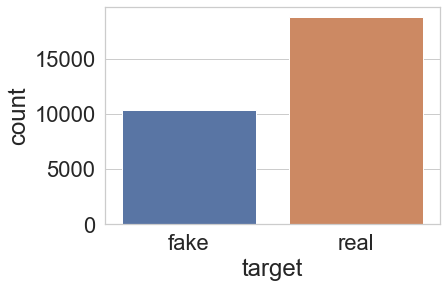

In [174]:
#sns.set_style("darkgrid")
print(df.target.value_counts())
sns.countplot(df.target)

Random under-sampling:
fake    10304
real    10304
Name: target, dtype: int64
(20608, 5)


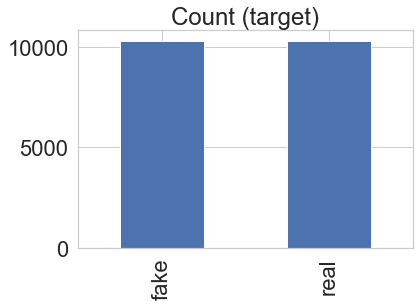

In [175]:
# Class count
count_class_real, count_class_fake = df.target.value_counts()

# Divide by class
df_class_real = df[df['target'] == "real"]
df_class_fake = df[df['target'] == "fake"]


df_class_real_under = df_class_real.sample(count_class_fake)
df = pd.concat([df_class_real_under, df_class_fake], axis=0)

print('Random under-sampling:')
print(df.target.value_counts())

df.target.value_counts().plot(kind='bar', title='Count (target)');

df.head()
print(df.shape)

In [176]:
print(df.target.value_counts())

fake    10304
real    10304
Name: target, dtype: int64


In [9]:
#real_source=df[df['target']=='real']['source'].value_counts().sort_values(ascending=False).index
#fake_source=df[df['target']=='fake']['source'].value_counts().sort_values(ascending=False).index

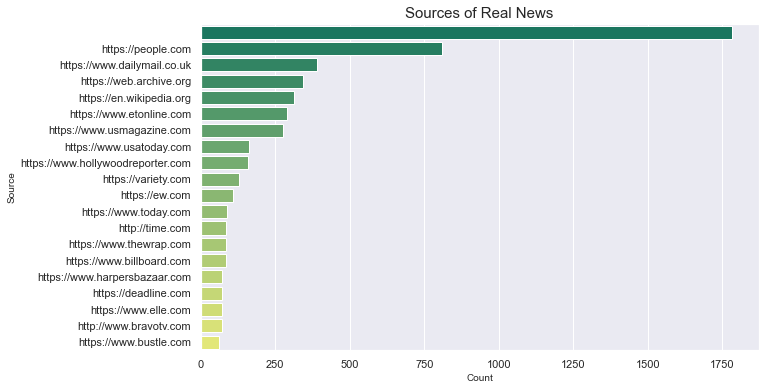

In [177]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 1)
sns.countplot(y='source', data=df[df['target']=='real'],order=df[df['target']=='real']['source'].value_counts().sort_values(ascending=False).iloc[:20].index,palette='summer')
plt.xlabel('Count',fontsize=10)
plt.ylabel('Source',fontsize=10)
plt.title('Sources of Real News',fontsize=15)
plt.show()

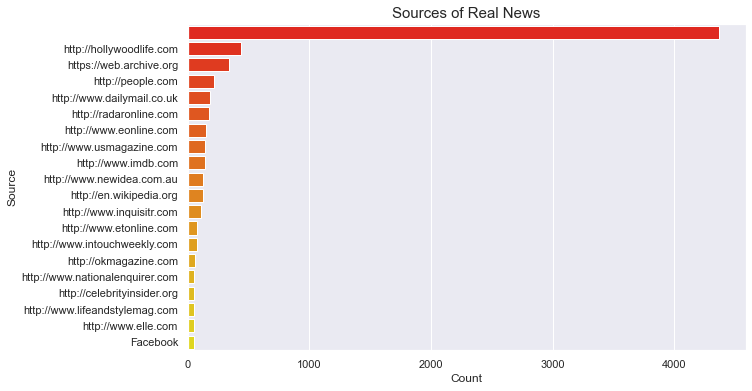

In [178]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 1)
sns.countplot(y='source', data=df[df['target']=='fake'],order=df[df['target']=='fake']['source'].value_counts().sort_values(ascending=False).iloc[:20].index,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Real News',fontsize=15)
plt.show()

In [179]:
new=[]
for x in df[df['target']=='fake']['source'].unique():
    if x in df[df['target']=='real']['source'].unique():
        new.append(x)
print(new)

['www.addictinginfo.org', 'eaglerising.com', 'conservativebyte.com', '', 'winningdemocrats.com', 'freedomdaily.com', 'occupydemocrats.com', 'rightwingnews.com', 'addictinginfo.org', 'https://www.factcheck.org/', 'https://web.archive.org', 'https://www.dailymail.co.uk', 'http://www.politico.com', 'http://www.justjared.com', 'http://time.com', 'http://www.harpersbazaar.com', 'http://www.cnn.com', 'http://abcnews.go.com', 'http://celebrityinsider.org', 'http://www.nytimes.com', 'http://www.latimes.com', 'http://www.twoeggz.com', 'http://tasteofcountry.com', 'http://thestir.cafemom.com', 'http://www.cbsnews.com', 'http://www.today.com', 'http://www.bravotv.com', 'https://www.glamourmagazine.co.uk', 'http://www.biphoo.com', 'http://www.mtv.com', 'http://www.clooneysopenhouse.com', 'http://www.vulture.com', 'http://nymag.com', 'http://www.nydailynews.com', 'http://money.cnn.com', 'http://www.washingtonpost.com', 'http://extratv.com', 'http://www.mtv.co.uk', 'http://www.justjaredjr.com', 'htt

In [180]:
df['common']=df['source'].apply(lambda x: x if x in new else 0)

In [181]:
df1=df[df['common']!=0]
df1.head()

,id,title,text,source,target,common
19858,gossipcop-861595,Scarlett Johansson and Her Rough Night Co-Star...,Scarlett Johansson and Her Rough Night Co-Star...,https://medium.com,real,https://medium.com
16002,gossipcop-895410,Remembering David Cassidy: His Life in Pictures,Cassidy and his third wife had one child toget...,https://people.com,real,https://people.com
16523,gossipcop-861465,Lena Dunham Sheds All Her Clothes to Send a St...,Lena Dunham Sheds All Her Clothes to Send a St...,https://medium.com,real,https://medium.com
5602,natural_disaster,,@KlaraJoelsson Well I have seen it now! That's...,,real,
1797,natural_disaster,,@etribune US Drone attack kills 4-suspected m...,,real,


In [182]:
df.head()

,id,title,text,source,target,common
19858,gossipcop-861595,Scarlett Johansson and Her Rough Night Co-Star...,Scarlett Johansson and Her Rough Night Co-Star...,https://medium.com,real,https://medium.com
20786,gossipcop-899949,"Your Complete Guide to Visiting Laurel, Missis...","Nobody knows and loves Laurel, Mississippi, qu...",https://www.countryliving.com,real,0
1175,covid,Who is at high risk for serious illness from C...,COVID-19 is a new disease and there is limited...,https://www.cdc.gov/,real,0
16002,gossipcop-895410,Remembering David Cassidy: His Life in Pictures,Cassidy and his third wife had one child toget...,https://people.com,real,https://people.com
27250,gossipcop-947835,Angelina Jolie Channels Meghan Markle At Royal...,Stop us if this sounds familiar: An American a...,https://www.huffpost.com,real,0


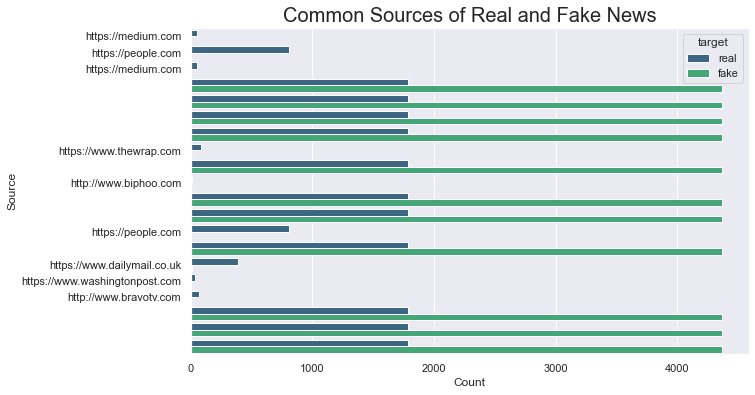

In [183]:
plt.figure(figsize=(10,6))
sns.countplot(y='common',data=df1,order=df1['source'].iloc[:20],hue = 'target',palette='viridis')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Common Sources of Real and Fake News',fontsize=20)
plt.show()

In [184]:
df['all'] = df['title']+ ''+ df['text']
df.head()

,id,title,text,source,target,common,all
19858,gossipcop-861595,Scarlett Johansson and Her Rough Night Co-Star...,Scarlett Johansson and Her Rough Night Co-Star...,https://medium.com,real,https://medium.com,Scarlett Johansson and Her Rough Night Co-Star...
20786,gossipcop-899949,"Your Complete Guide to Visiting Laurel, Missis...","Nobody knows and loves Laurel, Mississippi, qu...",https://www.countryliving.com,real,0,"Your Complete Guide to Visiting Laurel, Missis..."
1175,covid,Who is at high risk for serious illness from C...,COVID-19 is a new disease and there is limited...,https://www.cdc.gov/,real,0,Who is at high risk for serious illness from C...
16002,gossipcop-895410,Remembering David Cassidy: His Life in Pictures,Cassidy and his third wife had one child toget...,https://people.com,real,https://people.com,Remembering David Cassidy: His Life in Picture...
27250,gossipcop-947835,Angelina Jolie Channels Meghan Markle At Royal...,Stop us if this sounds familiar: An American a...,https://www.huffpost.com,real,0,Angelina Jolie Channels Meghan Markle At Royal...


In [185]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
#sw_list = ['say','said','though','asked','time','including','made','including','time','number','one','called','added','according','made','put'] #adding more stop words in the list to refine the word cloud
#stop.extend(sw_list)
punctuation = list(string.punctuation)
stop.extend(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gopalika14/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text


In [97]:
#Apply function on column
df['text']=df['text'].apply(denoise_text)
df['text']= df['text'].astype('string')
print(df['text'].dtype)

string


In [99]:
#df['text']=df['text'].apply(denoise_text)

In [186]:
#More comprehensive list of stop words
import gensim
from gensim.parsing.preprocessing import STOPWORDS
stop_g = gensim.parsing.preprocessing.STOPWORDS
stop_g = STOPWORDS.union(set(['it','that','say','said','though','asked','time','including','made','including','time','number','one','called','added','according','made','put']))

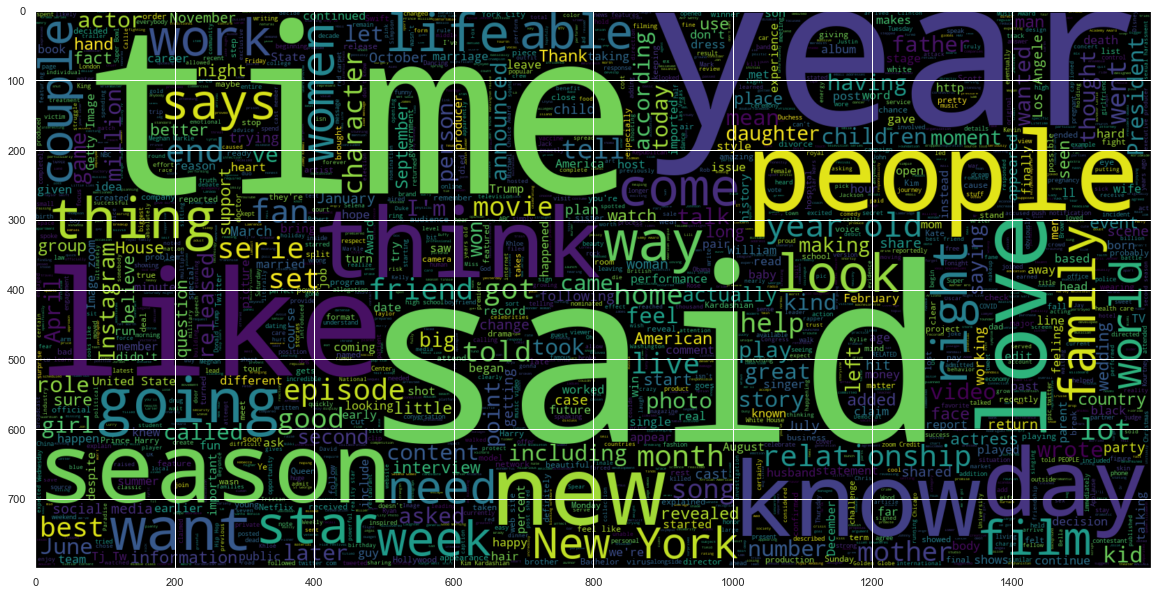

In [187]:
# MORE COMPREHENSIVE WORD CLOUD
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df["target"] == "real"].text))
plt.imshow(wc , interpolation = 'bilinear')

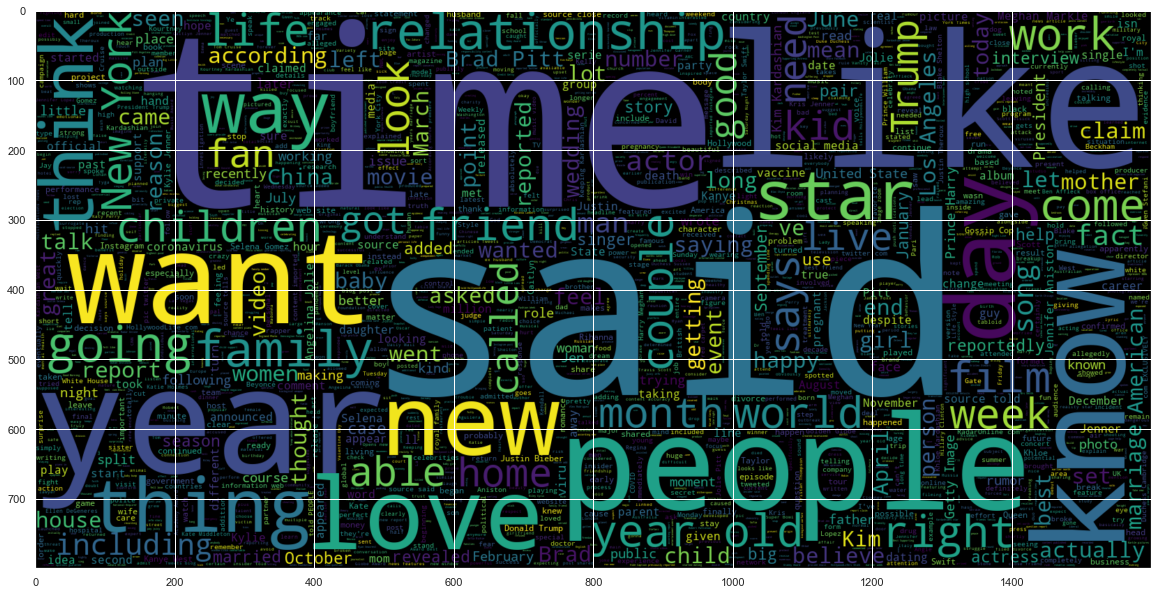

In [102]:
# MORE COMPREHENSIVE WORD CLOUD
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df["target"] == "fake"].text))
plt.imshow(wc , interpolation = 'bilinear')

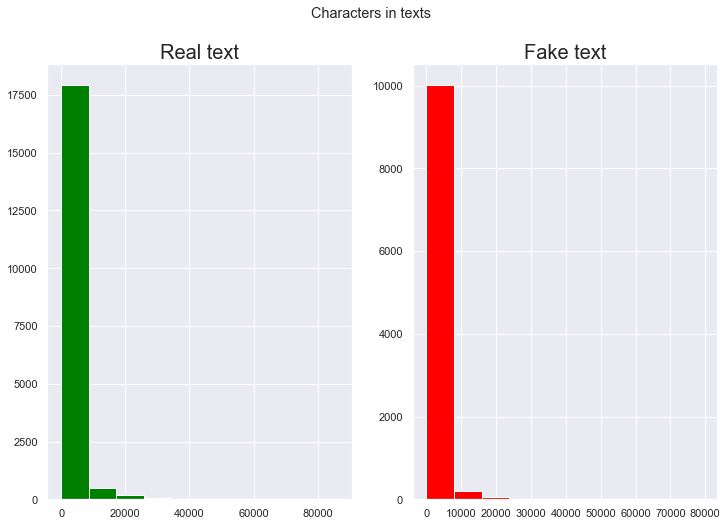

In [103]:
#characters in text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['target']=="real"]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Real text',fontsize=20)
text_len=df[df['target']=="fake"]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text',fontsize=20)
fig.suptitle('Characters in texts')
plt.show()

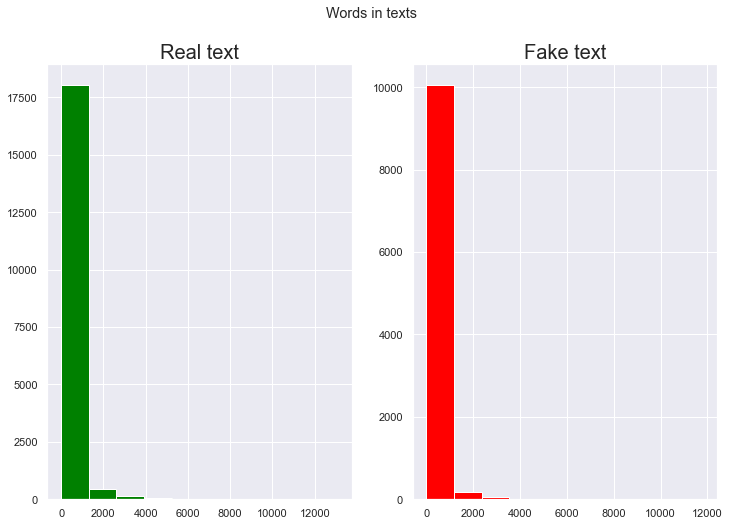

In [104]:
#paragraph text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['target']=="real"]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Real text',fontsize=20)
text_len=df[df['target']=="fake"]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Fake text',fontsize=20)
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

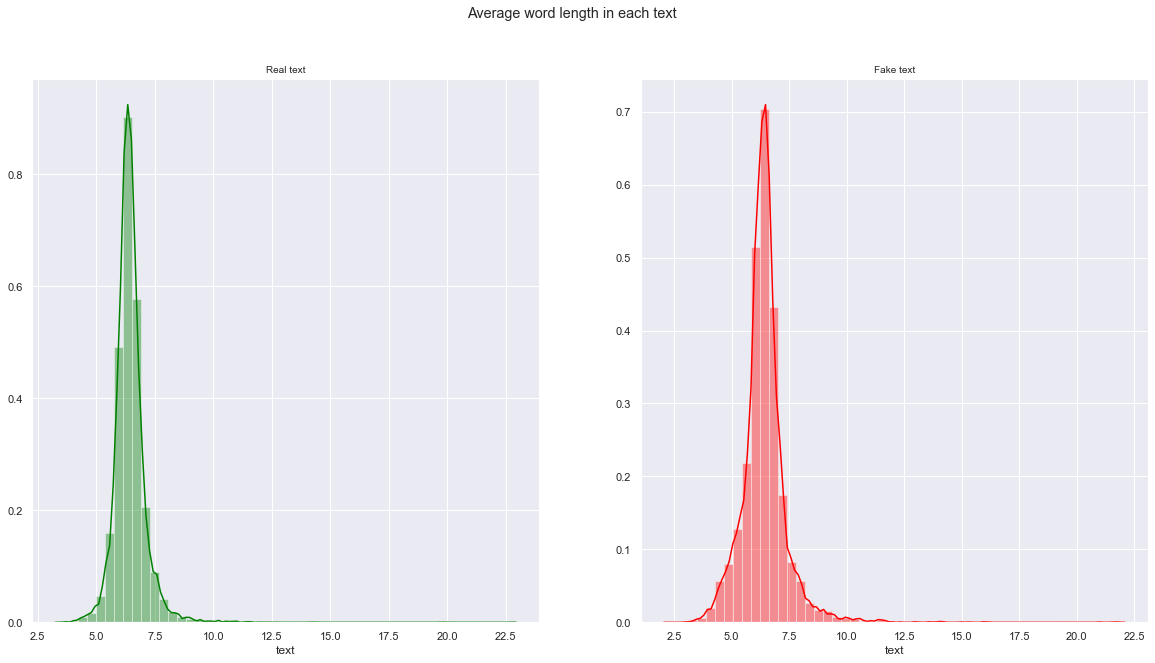

In [105]:
#paragraph text - avg length of word
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['target']=="real"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Real text',fontsize=10)
word=df[df['target']=="fake"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake text',fontsize=10)
fig.suptitle('Average word length in each text')

In [106]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['woke', 'morning', 'find', 'variation', 'headline']

In [107]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(20)
most_common = dict(most_common)
most_common

{'also': 25130,
 'one': 25028,
 '—': 22811,
 'like': 22102,
 'first': 21497,
 'would': 20334,
 'said': 19582,
 'new': 17126,
 'time': 16443,
 'two': 16034,
 'get': 16015,
 'people': 15758,
 'going': 14923,
 'told': 13312,
 'think': 13107,
 'show': 11957,
 '–': 11935,
 'back': 11855,
 'really': 11628,
 'made': 11596}

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

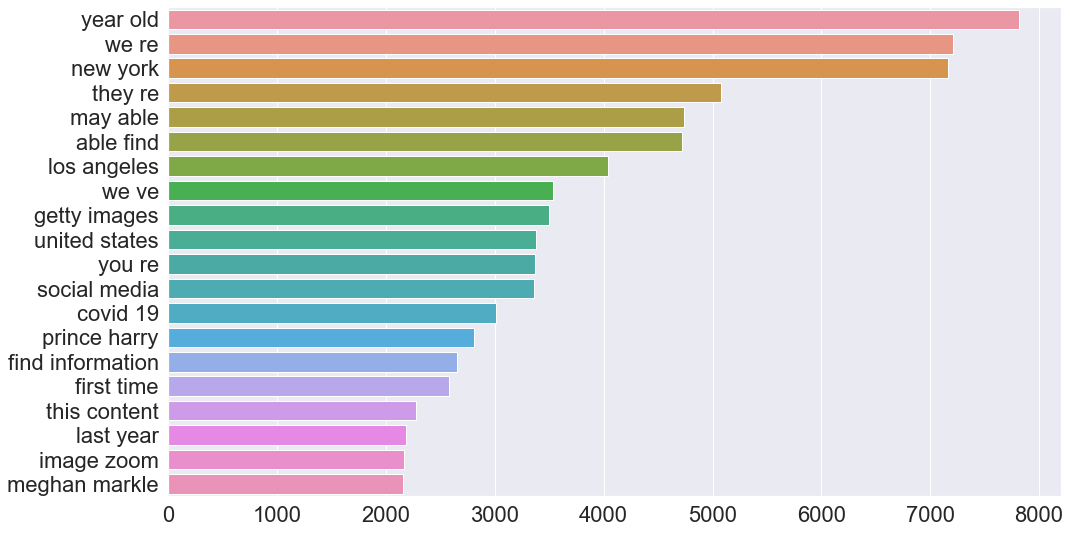

In [109]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,20,2)
most_common_uni = dict(most_common_uni)
sns.set(font_scale = 2)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [188]:
df_real= df[df['target']=="real"]
df_real.head()
print(df_real.shape)
df_real.head(5)

(10304, 7)


,id,title,text,source,target,common,all
19858,gossipcop-861595,Scarlett Johansson and Her Rough Night Co-Star...,Scarlett Johansson and Her Rough Night Co-Star...,https://medium.com,real,https://medium.com,Scarlett Johansson and Her Rough Night Co-Star...
20786,gossipcop-899949,"Your Complete Guide to Visiting Laurel, Missis...","Nobody knows and loves Laurel, Mississippi, qu...",https://www.countryliving.com,real,0,"Your Complete Guide to Visiting Laurel, Missis..."
1175,covid,Who is at high risk for serious illness from C...,COVID-19 is a new disease and there is limited...,https://www.cdc.gov/,real,0,Who is at high risk for serious illness from C...
16002,gossipcop-895410,Remembering David Cassidy: His Life in Pictures,Cassidy and his third wife had one child toget...,https://people.com,real,https://people.com,Remembering David Cassidy: His Life in Picture...
27250,gossipcop-947835,Angelina Jolie Channels Meghan Markle At Royal...,Stop us if this sounds familiar: An American a...,https://www.huffpost.com,real,0,Angelina Jolie Channels Meghan Markle At Royal...


In [116]:
corpus = get_corpus(df_real.text)
corpus[:5]

['Saturday,', 'September', '17', '8:30', 'pm']

In [117]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(20)
most_common = dict(most_common)
most_common

{'one': 19021,
 'also': 18789,
 'like': 16861,
 'first': 16744,
 '—': 16278,
 'would': 15057,
 'said': 14922,
 'new': 12803,
 'get': 12348,
 'people': 12219,
 'time': 12070,
 'going': 12054,
 'two': 11949,
 'think': 10644,
 'show': 9834,
 'told': 9174,
 'know': 8987,
 'really': 8948,
 'back': 8876,
 'made': 8679}

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

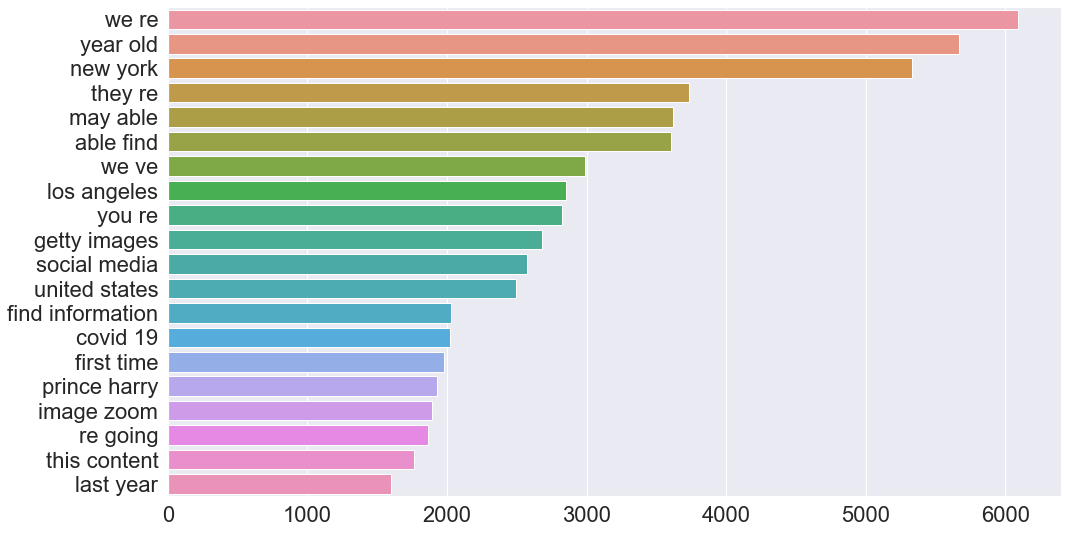

In [130]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df_real.text,20,2)
most_common_uni = dict(most_common_uni)
sns.set(font_scale = 2)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [157]:
df_fake= df[df['target']=="fake"]
df_fake.head()
print(df_fake.shape)

(10304, 8)


In [127]:
corpus_2 = get_corpus(df_fake.text)
corpus_2[:5]

['woke', 'morning', 'find', 'variation', 'headline']

In [128]:
from collections import Counter
counter2 = Counter(corpus_2)
most_common2 = counter2.most_common(20)
most_common2 = dict(most_common2)
most_common2

{'—': 6533,
 'also': 6341,
 'one': 6007,
 'would': 5277,
 'like': 5241,
 'first': 4753,
 'said': 4660,
 'time': 4373,
 'new': 4323,
 'told': 4138,
 'two': 4085,
 'source': 3962,
 'get': 3667,
 'people': 3539,
 '–': 3433,
 'may': 3311,
 'even': 3190,
 'back': 2979,
 'made': 2917,
 'going': 2869}

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

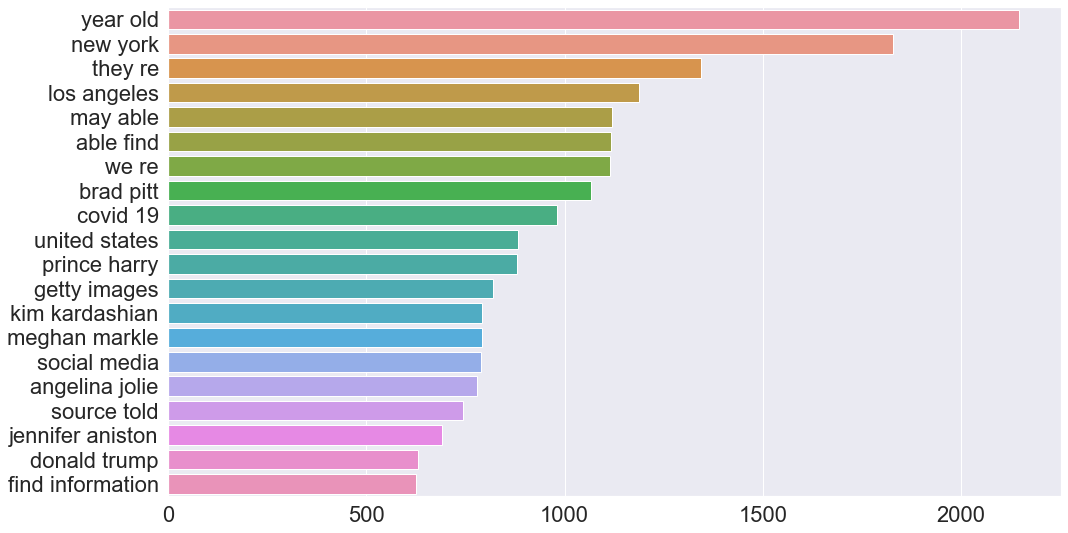

In [129]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df_fake.text,20,2)
most_common_uni = dict(most_common_uni)
sns.set(font_scale = 2)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [190]:
df['title']= df['title'].fillna("NAN") 
df.dropna(subset=['title'], inplace=True)
df['title']= df['title'].astype('string')
df['title_length']=df['title'].apply(lambda x: len(x))

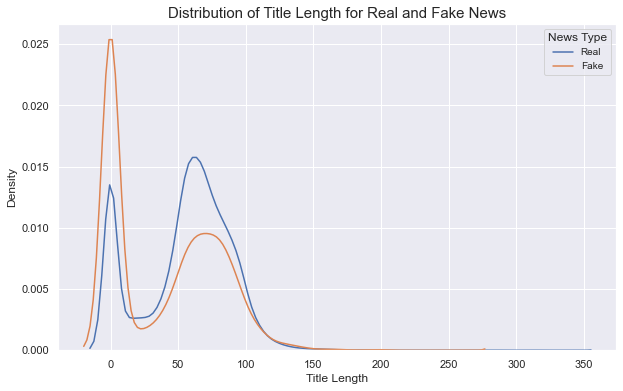

In [191]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['target']=='real']['title_length'])
sns.kdeplot(df[df['target']=='fake']['title_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribution of Title Length for Real and Fake News',fontsize=15)
plt.show()

### Sentiment analysis for Fake and real news title

In [213]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment_real=(df[df['target']=='real']['title']).astype(str)

for row in df_sentiment_real:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc_real = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc_real):
        if df_polarity_desc_real['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc_real['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc_real['Sentiment_Type'] = df_polarity_desc_real.apply(f, axis=1)

#plt.figure(figsize=(10,10))
#sns.set_style("whitegrid")
#ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [214]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment_fake=(df[df['target']=='fake']['title']).astype(str)

for row in df_sentiment_fake:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc_fake = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc_fake):
        if df_polarity_desc_fake['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc_fake['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc_fake['Sentiment_Type'] = df_polarity_desc_fake.apply(f, axis=1)

#plt.figure(figsize=(10,10))
#sns.set_style("whitegrid")
#ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [225]:
df_polarity_desc_fake['target'] = 'fake'
df_polarity_desc_fake.shape


(10304, 5)

In [226]:
df_polarity_desc_real['target'] = 'real'
df_polarity_desc_real.shape

(10304, 5)

In [224]:
data_sentiment = pd.concat([df_polarity_desc_fake,df_polarity_desc_real], ignore_index= False, sort= True)
data_sentiment.head()

,Sentiment_Type,polarity,sentence,sentiment,target
0,Neutral,0.000000,Proof The Mainstream Media Is Manipulating The...,0.000000,fake
1,Neutral,0.000000,Charity: Clinton Foundation Distributed “Water...,0.000000,fake
2,Neutral,0.625000,A Hillary Clinton Administration May be Entire...,0.000000,fake
3,Neutral,0.800000,Trump’s Latest Campaign Promise May Be His Mos...,0.000000,fake
4,Negative,0.288889,Website is Down For Maintenance,-0.155556,fake


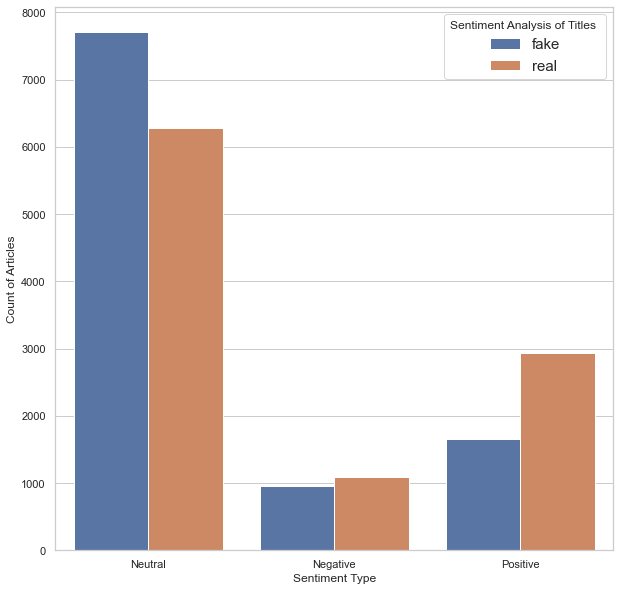

In [230]:
plt.figure(figsize=(10,10))
sns.countplot(x="Sentiment_Type", hue="target", data=data_sentiment)
plt.xlabel('Sentiment Type',fontsize=12)
plt.ylabel('Count of Articles',fontsize=12)
plt.legend(title='Sentiment Analysis of Titles ',fontsize=15)
plt.show()

### Sentiment Analysis and LDA

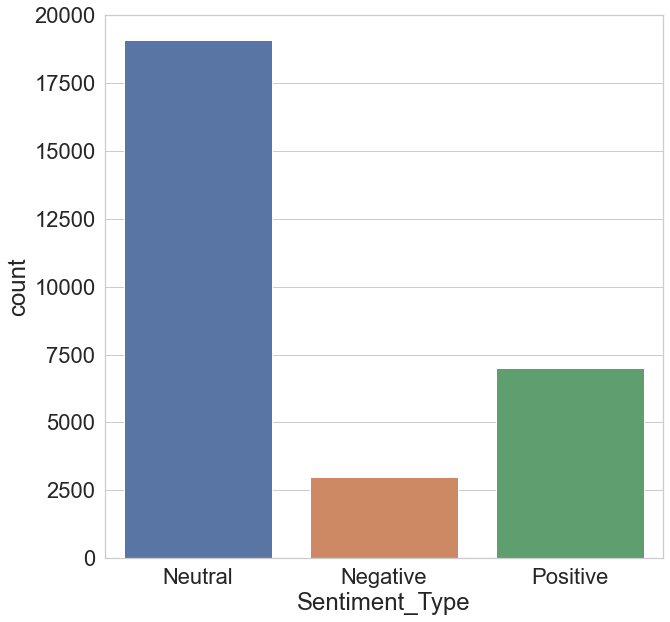

In [66]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=df['title'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [152]:
# All data by real

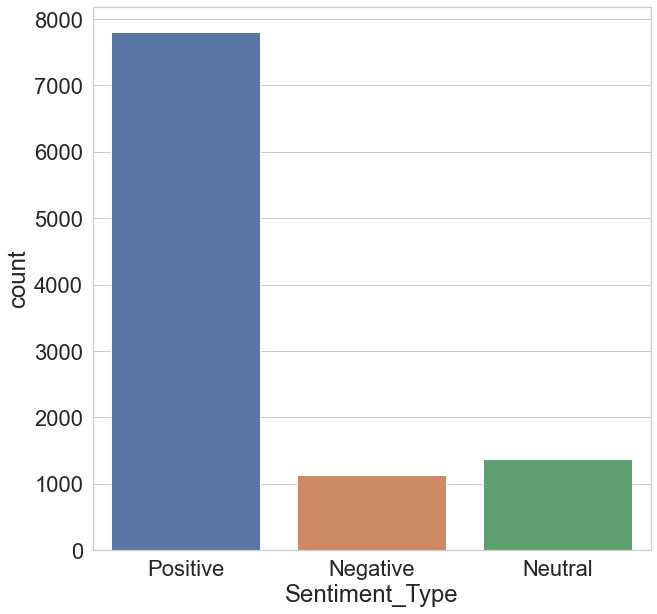

In [159]:
#Text-REAL
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=df_real['text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [153]:
# All data by fake

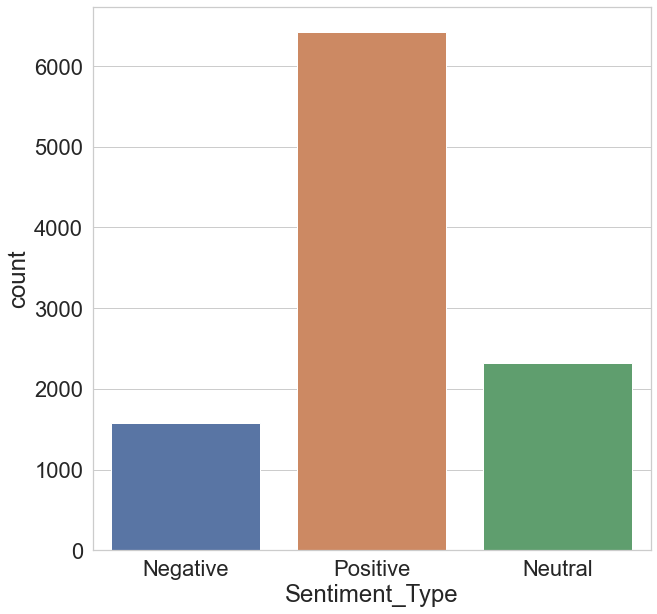

In [161]:
#Text-FAKE
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=df_fake['text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [133]:
#Sentiment Topic wise
df0 = pd.read_csv("/Users/gopalika14/Desktop/tweet_data_modeling.csv")
print(df0.shape)
df0.head()

(29052, 9)


,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,news_class
0,0,buzzfeed,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,www.addictinginfo.org,fake,woke morning variation headline splashed news ...,proof mainstream medium manipulating election ...,0
1,1,buzzfeed,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,eaglerising.com,fake,president clinton clinton health access initia...,charity clinton foundation distributed watered...,0
2,2,buzzfeed,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,eaglerising.com,fake,collapsing trying step van removed ceremony ne...,hillary clinton administration entirely run fi...,0
3,3,buzzfeed,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",www.addictinginfo.org,fake,donald trump deplorable he suggested building ...,trump latest campaign promise horrible,0
4,4,buzzfeed,Website is Down For Maintenance,Website is Down For Maintenance,www.proudcons.com,fake,website maintenance,website maintenance,0


In [134]:
# Split data for topic specific modelling
polit = df0[df0['id'].str.contains('polit')]
print(polit.shape)

gossip = df0[df0['id'].str.contains('gossip')]
print(gossip.shape)

covid = df0[df0['id'].str.contains('covid')]
print(covid.shape)

natural = df0[df0['id'].str.contains('natural')]
print(natural.shape)

(955, 9)
(19143, 9)
(1159, 9)
(7613, 9)


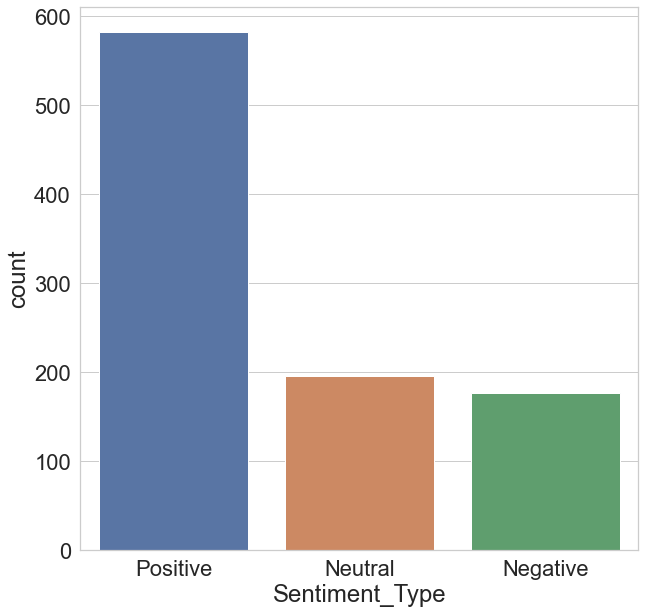

In [135]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=polit['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

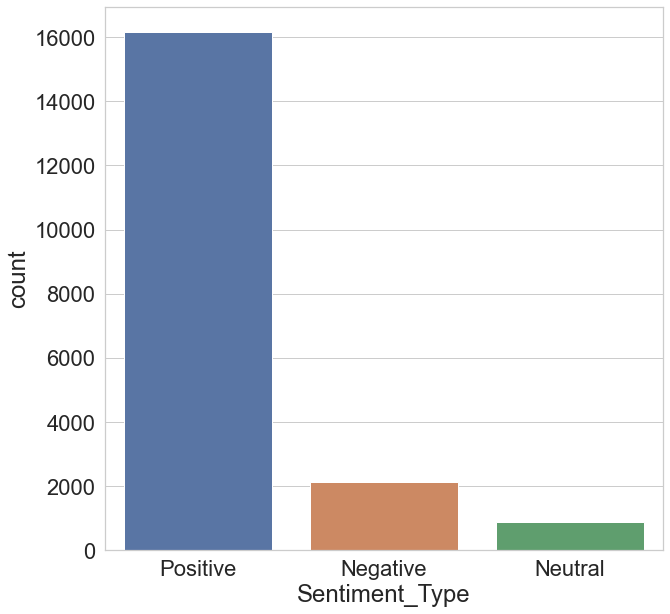

In [136]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=gossip['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

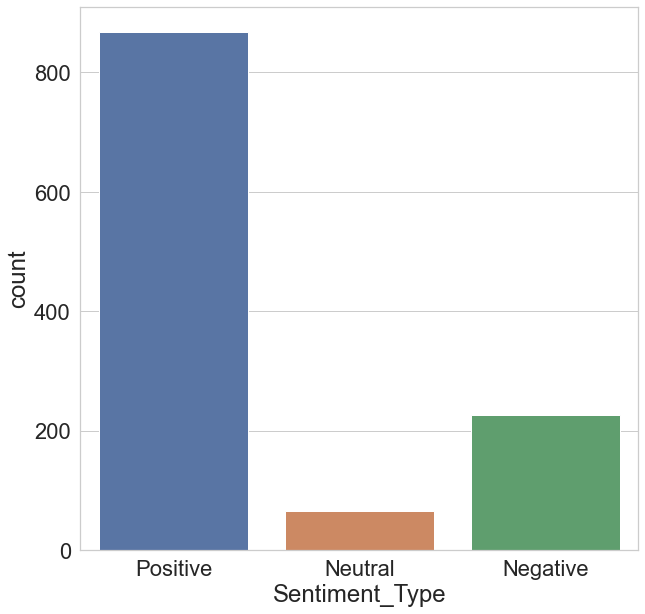

In [137]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=covid['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

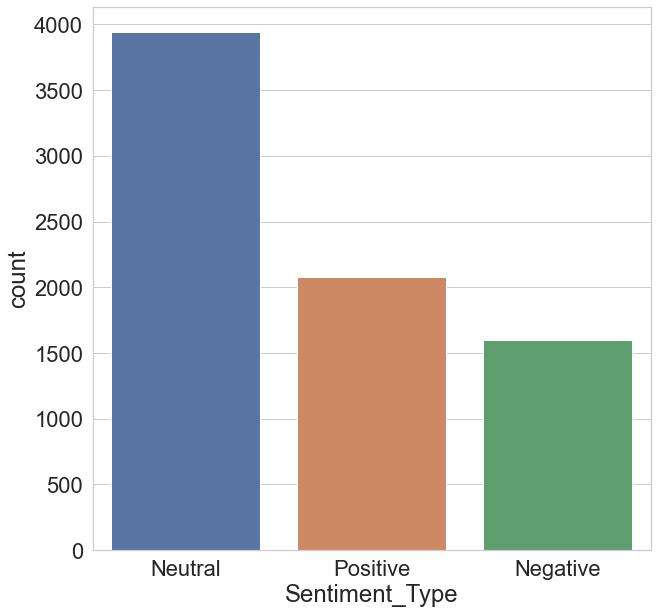

In [138]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=natural['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

# DIVIDING DATA INTO REAL & FAKE for Sentiment Analysis

In [139]:
df_real0= df0[df0['target']=="real"]
df_real0.head()
print(df_real0.shape)
df_real0.head(5)

(18748, 9)


,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,news_class
91,91,buzzfeed,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",eaglerising.com,real,saturday september pm est explosion rocked wes...,terrorist attack nycwhy politically correct ea...,1
92,92,buzzfeed,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,abcn.ws,real,day protest police killing africanamerican man...,donald trump drug big factor charlotte protest,1
93,93,buzzfeed,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",rightwingnews.com,real,obama giving liberty enhances security america...,obama giving liberty enhances security america...,1
94,94,buzzfeed,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,politi.co,real,getty image wealth nation trump v clinton fund...,trump v clinton fundamental clash economy work,1
95,95,buzzfeed,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,abcn.ws,real,president obama today vetoed allow survivor at...,president obama veto victim setting showdown c...,1


In [140]:
df_fake0= df0[df0['target']=="fake"]
df_fake0.head()
print(df_fake0.shape)
df_fake0.head(5)

(10304, 9)


,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,news_class
0,0,buzzfeed,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,www.addictinginfo.org,fake,woke morning variation headline splashed news ...,proof mainstream medium manipulating election ...,0
1,1,buzzfeed,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,eaglerising.com,fake,president clinton clinton health access initia...,charity clinton foundation distributed watered...,0
2,2,buzzfeed,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,eaglerising.com,fake,collapsing trying step van removed ceremony ne...,hillary clinton administration entirely run fi...,0
3,3,buzzfeed,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",www.addictinginfo.org,fake,donald trump deplorable he suggested building ...,trump latest campaign promise horrible,0
4,4,buzzfeed,Website is Down For Maintenance,Website is Down For Maintenance,www.proudcons.com,fake,website maintenance,website maintenance,0


In [141]:
# Split data for topic specific modelling
polit0 = df_real0[df_real0['id'].str.contains('polit')]
print(polit0.shape)

gossip0 = df_real0[df_real0['id'].str.contains('gossip')]
print(gossip0.shape)

covid0 = df_real0[df_real0['id'].str.contains('covid')]
print(covid0.shape)

natural0 = df_real0[df_real0['id'].str.contains('natural')]
print(natural0.shape)

(559, 9)
(14243, 9)
(584, 9)
(3271, 9)


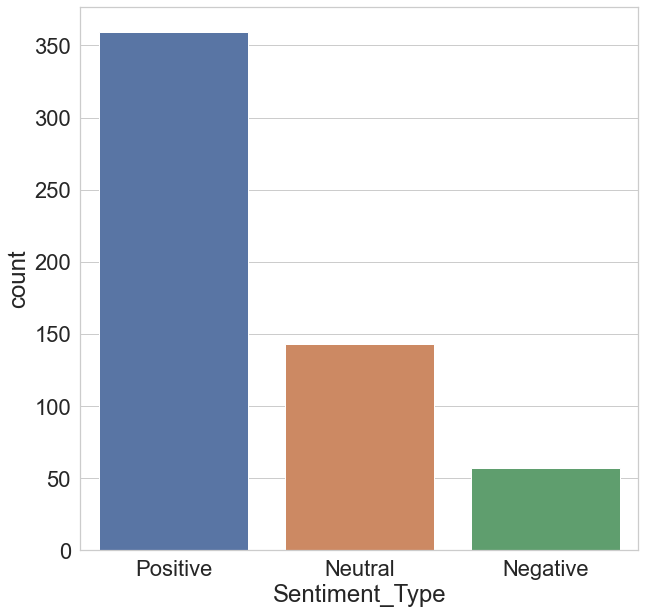

In [143]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=polit0['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

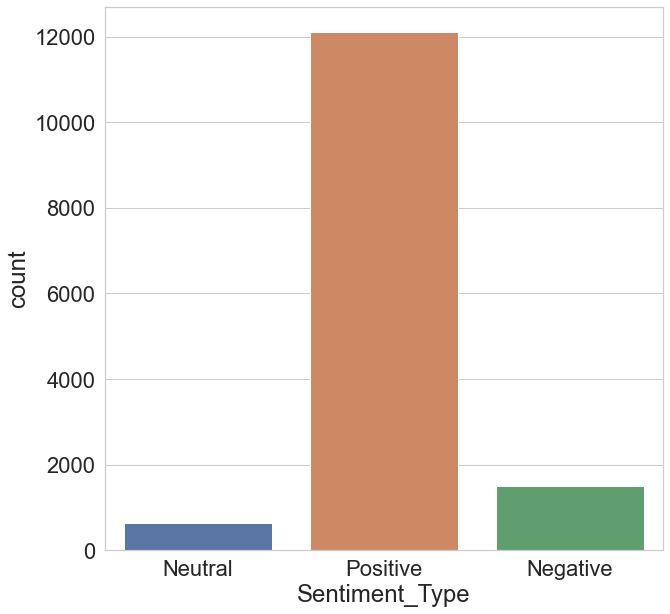

In [144]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=gossip0['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

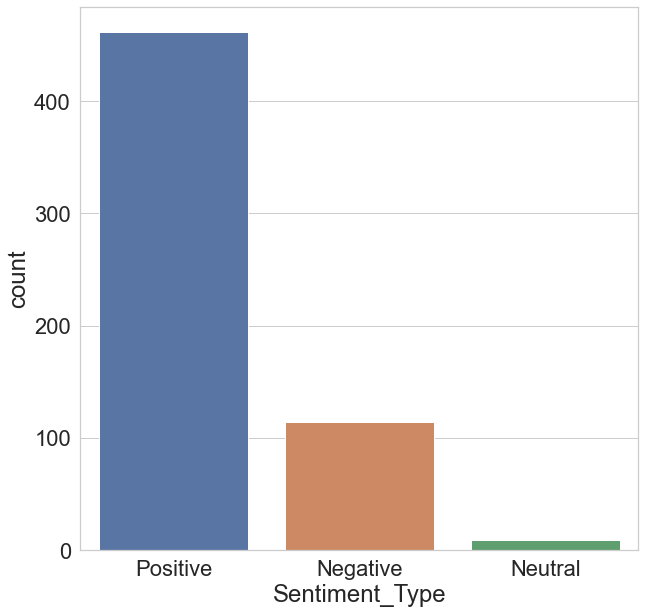

In [145]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=covid0['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

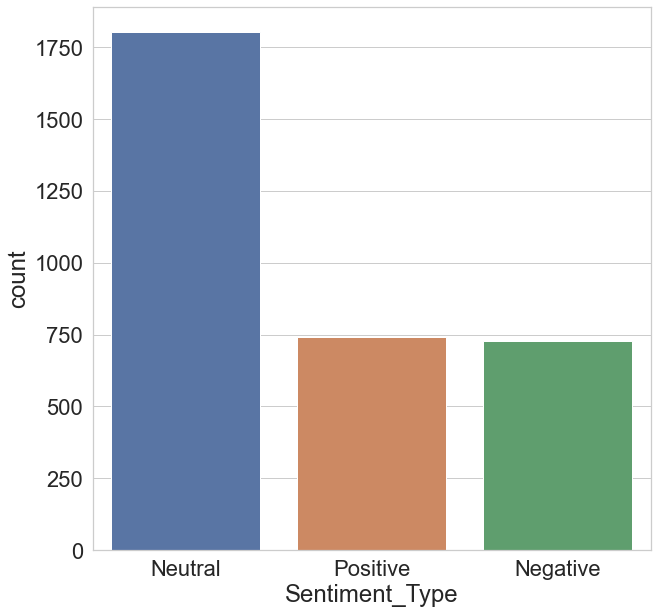

In [146]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=natural0['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [147]:
# Split data for topic specific modelling
polit1 = df_fake0[df_fake0['id'].str.contains('polit')]
print(polit0.shape)

gossip1 = df_fake0[df_fake0['id'].str.contains('gossip')]
print(gossip0.shape)

covid1 = df_fake0[df_fake0['id'].str.contains('covid')]
print(covid0.shape)

natural1 = df_fake0[df_fake0['id'].str.contains('natural')]
print(natural0.shape)

(559, 9)
(14243, 9)
(584, 9)
(3271, 9)


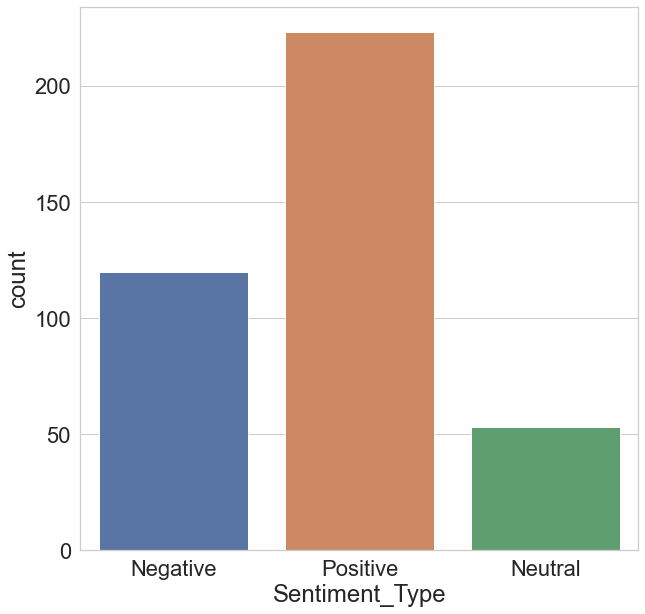

In [148]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=polit1['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

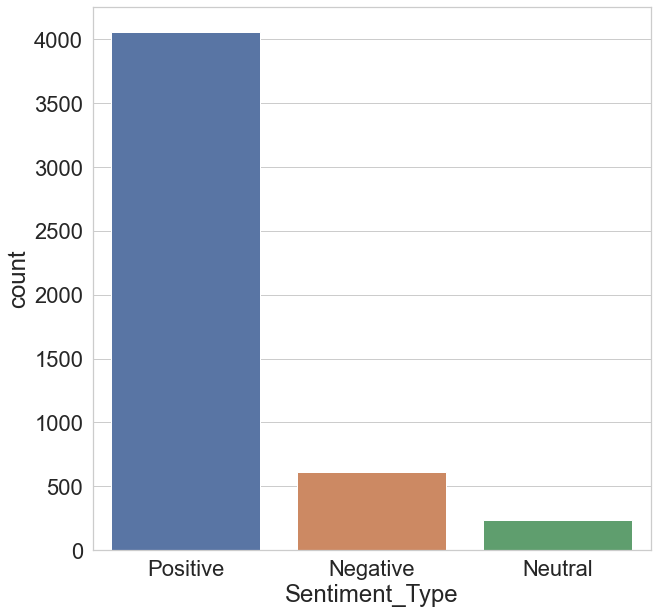

In [149]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=gossip1['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

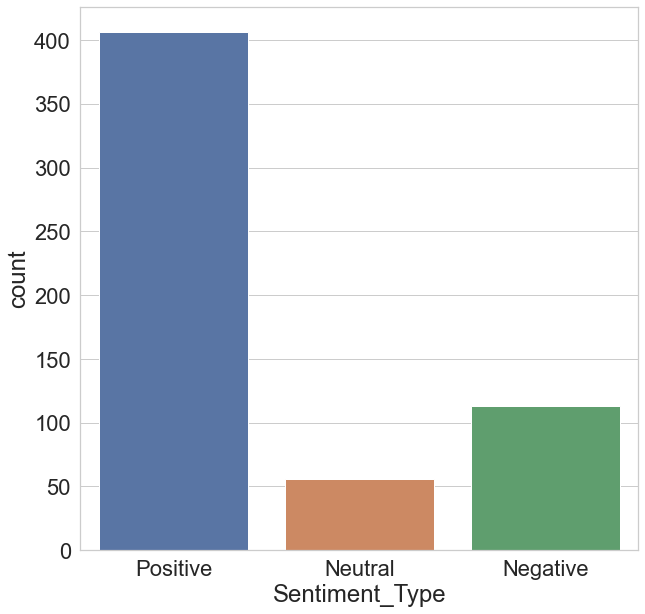

In [150]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=covid1['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

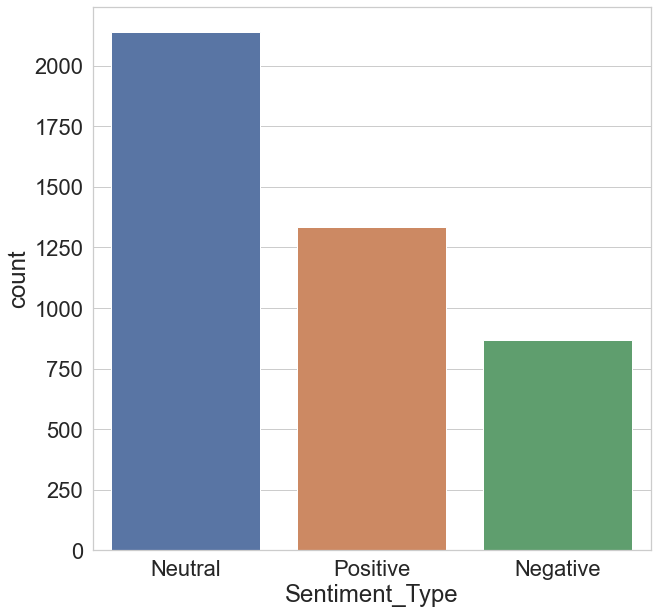

In [151]:
from textblob import TextBlob
bloblist_desc = list()

df_sentiment=natural1['clean_text'].astype(str)

for row in df_sentiment:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
    def f(df_polarity_desc):
        if df_polarity_desc['sentiment'] > 0:
            val = "Positive"
        elif df_polarity_desc['sentiment'] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

# LDA

In [162]:
#LDA - Implementation_2
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis.gensim
import gensim
from gensim.parsing.preprocessing import STOPWORDS
stop_g = gensim.parsing.preprocessing.STOPWORDS
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
lemmatizer = WordNetLemmatizer()

In [163]:
# list for tokenized documents in loop
texts = []

# loop through document list
for i in df0['clean_text'].iteritems():
    # clean and tokenize document string
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [raw for raw in tokens if not raw in stop_g]
    
    # remove word containing only single char
    new_lemma_tokens = [raw for raw in stopped_tokens if not len(raw) == 1]
    
    # add tokens to list
    texts.append(new_lemma_tokens)

# sample data
print(texts[0])

['woke', 'morning', 'variation', 'headline', 'splashed', 'news', 'feedbill', 'clinton', 'natural', 'foundation', 'donor', 'seek', 'favorsheres', 'googlenaturally', 'reaction', 'oh', 'st', 'clinton', 'damage', 'wife', 'campaign', 'nowof', 'course', 'headline', 'sound', 'awful', 'play', 'right', 'idea', 'clinton', 'foundation', 'pay', 'play', 'like', 'donald', 'trump', 'saying', 'unfortunately', 'reading', 'headline', 'people', 'dont', 'real', 'story', 'real', 'story', 'pay', 'playit', 'natural', 'people', 'whove', 'political', 'ally', 'personal', 'friend', 'ask', 'thing', 'trusted', 'state', 'department', 'wouldnt', 'shouldnt', 'clinton', 'told', 'npr', 'interview', 'aired', 'monday', 'morning', 'source', 'cnnin', 'word', 'people', 'ask', 'favor', 'certainly', 'doesnt', 'mean', 'theyll', 'leaked', 'email', 'shown', 'clinton', 'foundation', 'donor', 'gotten', 'meeting', 'clinton', 'turned', 'zero', 'evidence', 'pay', 'play', 'word', 'people', 'asked', 'favor', 'evidence', 'got', 'themnow

In [164]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [165]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=20)
import pprint
pprint.pprint(ldamodel.top_topics(corpus,topn=5))


[([(0.015235415, 'music'),
   (0.015142486, 'song'),
   (0.013514587, 'album'),
   (0.011582047, 'video'),
   (0.009654634, 'year')],
  -0.7103741710327017),
 ([(0.011820355, 'like'),
   (0.010922727, 'said'),
   (0.009816857, 'going'),
   (0.009544574, 'think'),
   (0.009322486, 'know')],
  -0.7663519298324224),
 ([(0.009060638, 'president'),
   (0.008237808, 'state'),
   (0.0067727217, 'american'),
   (0.0053561325, 'country'),
   (0.0053195404, 'people')],
  -0.7774110744476903),
 ([(0.07731345, 'content'),
   (0.07009356, 'able'),
   (0.04740837, 'information'),
   (0.033085283, 'imported'),
   (0.03017389, 'web')],
  -1.0482748832709734),
 ([(0.029017946, 'season'),
   (0.01996588, 'film'),
   (0.016352475, 'series'),
   (0.012022725, 'episode'),
   (0.011593192, 'award')],
  -1.2552689455087918),
 ([(0.052610837, 'edit'),
   (0.036052484, 'photo'),
   (0.030946633, 'image'),
   (0.018659862, 'getty'),
   (0.018018948, 'new')],
  -1.5333141376408501),
 ([(0.02172514, 'health'),
  

In [166]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.362986 -0.068373       1        1  45.073898
7      0.348187 -0.183033       2        1  21.629902
3      0.323020  0.128371       3        1  12.197013
13     0.309550  0.181570       4        1  10.276854
9      0.125488 -0.262253       5        1   3.975286
0      0.076291  0.195475       6        1   2.594390
1     -0.084863  0.101242       7        1   1.397949
12    -0.088235 -0.003068       8        1   1.138039
11    -0.189619 -0.004370       9        1   0.378058
10    -0.164461 -0.024987      10        1   0.352598
6     -0.199038 -0.006990      11        1   0.331543
14    -0.188120 -0.018235      12        1   0.320765
2     -0.203194 -0.012009      13        1   0.192759
4     -0.213880 -0.011564      14        1   0.074767
5     -0.214112 -0.011776      15        1   0.066178, topic_info=             Term          Freq         Total Category  logprob  loglift
1781       season  23830.000000  23830.000000  Default  30.0000  30.0000
1015         able   9643.000000   9643.000000  Default  29.0000  29.0000
101           new  34516.000000  34516.000000  Default  28.0000  28.0000
13885        film  15803.000000  15803.000000  Default  27.0000  27.0000
22036        edit   8857.000000   8857.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
34862     myanmar      1.434353      2.129869  Topic15  -8.0044   6.9252
34927  nowplaying      1.420027      2.115520  Topic15  -8.0144   6.9220
35594    warcraft      1.066229      1.761725  Topic15  -8.3009   6.8184
34936   solicitor      0.828828      1.524330  Topic15  -8.5528   6.7113
3125     massacre      1.435964    167.137634  Topic15  -8.0032   2.5636

[791 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
4342       1  0.058614        abc
4342       2  0.088075        abc
4342       3  0.847910        abc
4342       8  0.005217        abc
15503     13  0.985218  abdominal
...      ...       ...        ...
11626      3  0.094348    youtube
11626      4  0.551834    youtube
11626      8  0.304764    youtube
4202       1  0.999650      youve
14620      1  0.999803       zoom

[1355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 4, 14, 10, 1, 2, 13, 12, 11, 7, 15, 3, 5, 6])

In [167]:
k3 = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(k3,'/Users/gopalika14/Desktop/tweets_lda.html')